In [ ]:
#*************************************************************************
# TRAINING MODELS
#*************************************************************************
# 1. Linear Regression
# 2. Decision Trees
# 3. Random Forest
# 4. Support Vector Machines
# 5. Neural Networks

#*************************************************************************
#                   2. DECISION TREES
#*************************************************************************

# Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.
# In chapter 2, we used a DecisionTreeRegressor model on the housing dataset (it fitted quite well).


In [4]:
# Training and Visualizing a Decision Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# We'll use the Iris dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

# Train a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# Visualize the trained Decision Tree
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# To convert the .dot file to a .png file, run the following command in the terminal:
# dot -Tpng iris_tree.dot -o iris_tree.png


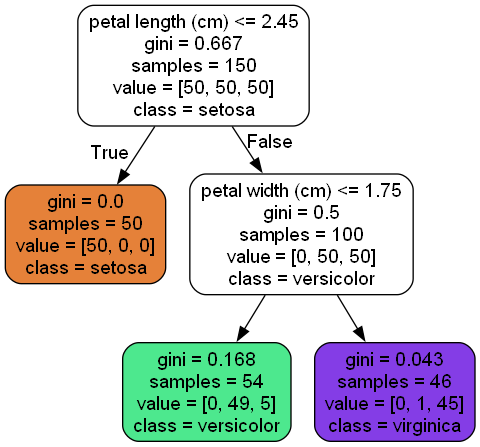

In [8]:
# Making Predictions
# Decision Trees are also capable of estimating the probability that a particular instance belongs to a particular class k. The predict_proba() method returns an array containing the probability that the instance belongs to each class.
# First step: flower petal < 2.45 cm -> class 0 (setosa)
# second step: petal width > 1.75 cm -> class 2 (virginica)
# Between 2.45 and 1.75 cm -> class 1 (versicolor)

# Predict probabilities
print(tree_clf.predict_proba([[5, 1.5]])) # [[0.         0.90740741 0.09259259]]
# Predict class
print(tree_clf.predict([[5, 1.5]])) # [1]


[[0.         0.90740741 0.09259259]]
[1]


In [ ]:
# Gini attibute
# Gini impurity is a measure of how impure a node is. A node is pure (gini=0) if all training instances it applies to belong to the same class.

# G_i = 1 - sum(p_i,k)^2

# For the red leaf, the gini score is 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168

# CART algorithm used by Scikit-Learn uses Gini impurity by default, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy".
# CART produces binary trees. Other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.


# Entropy attribute
# Entropy impurity is another way to measure impurity. A set's entropy is zero when it contains instances of only one class.


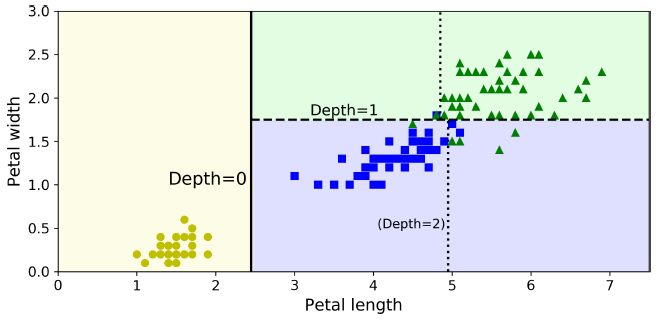

In [ ]:
# CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a solution that is reasonably good but not guaranteed to be optimal.

In [ ]:
# Regularization Hyperparameters

# max_depth: maximum depth of the tree
# min_samples_split: minimum number of samples a node must have before it can be split
# min_samples_leaf: minimum number of samples a leaf node must have
# min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
# max_leaf_nodes: maximum number of leaf nodes
# max_features: maximum number of features that are evaluated for splitting at each node


In [10]:
# Regression using Decision Trees
# Decision Trees are also capable of performing regression tasks. Let's use Scikit-Learn's DecisionTreeRegressor class to train a Decision Tree for a noisy quadratic dataset, with max_depth=2.

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Quadratic dataset
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Train a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

# Visualize the trained Decision Tree
export_graphviz(
    tree_reg,
    out_file="quadratic_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

# To convert the .dot file to a .png file, run the following command in the terminal:
# dot -Tpng quadratic_tree.dot -o quadratic_tree.png


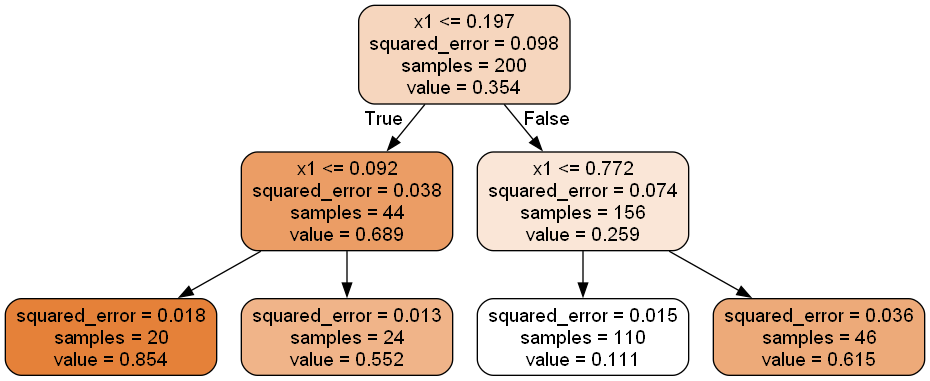

In [ ]:
# The tree looks very similar to the classification tree built earlier. The main difference is that instead of predicting a class in each node, it predicts a value.
# The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

# Instability
# Decision Trees have a few limitations. First, they are sensitive to small variations in the training data. For example, if you just remove the widest Iris-Versicolor from the Iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, you may get a completely different model.
# Random Forests can limit this instability by averaging predictions over many trees.
# Second, decision trees use orthogonal decision boundaries, which makes them sensitive to training set rotation. 
# One way to limit this problem is to use PCA, which often results in a better orientation of the training data.
